In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
cities

['castro',
 'ushuaia',
 'sabang',
 'atambua',
 'punta arenas',
 'ulladulla',
 'clyde river',
 'kalabo',
 'nador',
 'albany',
 'geraldton',
 'atuona',
 'saint-pierre',
 'saint george',
 'yellowknife',
 'khatanga',
 'eureka',
 'sentyabrskiy',
 'santa rosa',
 'taolanaro',
 'chokurdakh',
 'piterka',
 'illoqqortoormiut',
 'half moon bay',
 'yirol',
 'karaul',
 'cabo san lucas',
 'limekilns',
 'ribeira grande',
 'labuhan',
 'bethel',
 'hermanus',
 'east london',
 'jalu',
 'cape town',
 'taksimo',
 'bhanvad',
 'alexandria',
 'sinnamary',
 'pithapuram',
 'arraial do cabo',
 'ahipara',
 'bluff',
 'nioro',
 'kavieng',
 'sept-iles',
 'kapaa',
 'vaini',
 'port alfred',
 'busselton',
 'talaya',
 'sayyan',
 'new norfolk',
 'bargal',
 'puerto ayora',
 'nanakuli',
 'saint-georges',
 'bouloupari',
 'hithadhoo',
 'pisco',
 'kitale',
 'hilo',
 'pithora',
 'salalah',
 'avarua',
 'matara',
 'graham',
 'aklavik',
 'teofilo otoni',
 'longyearbyen',
 'rikitea',
 'leningradskiy',
 'ulyanovka',
 'domoni',
 'pas

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval       ')
print('-------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Dat Loading is complete.
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sabang
Processing Record 4 of Set 1 | atambua
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | kalabo
Processing Record 9 of Set 1 | nador
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | eureka
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | santa rosa
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | chokurdakh
Processing Recor

Processing Record 37 of Set 4 | baykit
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | pavlodar
Processing Record 41 of Set 4 | morondava
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | banja koviljaca
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | gizo
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | borogontsy
Processing Record 4 of Set 5 | hambantota
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | zahirabad
Processing Record 7 of Set 5 | arman
Processing Record 8 of Set 5 | luang prabang
Processing Record 9 of Set 5 | yelan-koleno
Process

Processing Record 29 of Set 8 | guigue
Processing Record 30 of Set 8 | dafeng
Processing Record 31 of Set 8 | ayan
Processing Record 32 of Set 8 | shache
Processing Record 33 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | linguere
Processing Record 36 of Set 8 | cap-aux-meules
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | boa viagem
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | grimshaw
Processing Record 44 of Set 8 | ust-nera
Processing Record 45 of Set 8 | boa vista
Processing Record 46 of Set 8 | sao filipe
Processing Record 47 of Set 8 | takaka
Processing Record 48 of Set 8 | canon city
Processing Record 49 of Set 8 | zhaotong
Processing Record 50 of Set 8 | guasdualito
Processing Record 1 o

Processing Record 16 of Set 12 | coquimbo
Processing Record 17 of Set 12 | valle de allende
Processing Record 18 of Set 12 | samarai
Processing Record 19 of Set 12 | koungou
Processing Record 20 of Set 12 | hillsboro
Processing Record 21 of Set 12 | taungdwingyi
Processing Record 22 of Set 12 | mehamn
Processing Record 23 of Set 12 | bacuit
City not found. Skipping...
Processing Record 24 of Set 12 | redmond
Processing Record 25 of Set 12 | kargasok
Processing Record 26 of Set 12 | mountain home
Processing Record 27 of Set 12 | burica
City not found. Skipping...
Processing Record 28 of Set 12 | decatur
Processing Record 29 of Set 12 | katherine
Processing Record 30 of Set 12 | saryg-sep
Processing Record 31 of Set 12 | ferrol
Processing Record 32 of Set 12 | neuquen
Processing Record 33 of Set 12 | khani
Processing Record 34 of Set 12 | aksu
Processing Record 35 of Set 12 | mitsamiouli
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | metro
Processing Record 

In [8]:
len(city_data)

552

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,72.84,58,0,3.51,BR,2020-08-28 19:43:59
1,Ushuaia,-54.80,-68.30,32.00,84,40,17.22,AR,2020-08-28 19:43:59
2,Sabang,5.89,95.32,83.41,72,100,6.06,ID,2020-08-28 19:43:59
3,Atambua,-9.11,124.89,66.65,76,14,4.45,ID,2020-08-28 19:43:59
4,Punta Arenas,-53.15,-70.92,33.80,69,40,20.80,CL,2020-08-28 19:43:59
...,...,...,...,...,...,...,...,...,...
547,Mao,39.89,4.27,78.80,83,0,6.93,ES,2020-08-28 19:44:58
548,Kibala,9.11,18.35,72.09,94,100,1.07,TD,2020-08-28 19:44:58
549,Saldanha,-33.01,17.94,51.80,81,32,4.70,ZA,2020-08-28 19:44:58
550,Inhambane,-23.86,35.38,73.40,94,0,16.11,MZ,2020-08-28 19:44:58


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-08-28 19:43:59,-24.79,-50.01,72.84,58,0,3.51
1,Ushuaia,AR,2020-08-28 19:43:59,-54.80,-68.30,32.00,84,40,17.22
2,Sabang,ID,2020-08-28 19:43:59,5.89,95.32,83.41,72,100,6.06
3,Atambua,ID,2020-08-28 19:43:59,-9.11,124.89,66.65,76,14,4.45
4,Punta Arenas,CL,2020-08-28 19:43:59,-53.15,-70.92,33.80,69,40,20.80
...,...,...,...,...,...,...,...,...,...
547,Mao,ES,2020-08-28 19:44:58,39.89,4.27,78.80,83,0,6.93
548,Kibala,TD,2020-08-28 19:44:58,9.11,18.35,72.09,94,100,1.07
549,Saldanha,ZA,2020-08-28 19:44:58,-33.01,17.94,51.80,81,32,4.70
550,Inhambane,MZ,2020-08-28 19:44:58,-23.86,35.38,73.40,94,0,16.11


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

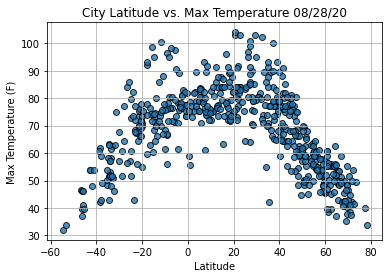

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

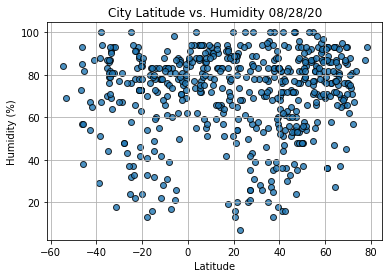

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

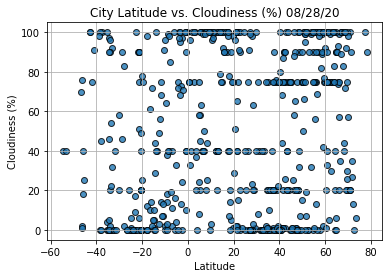

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

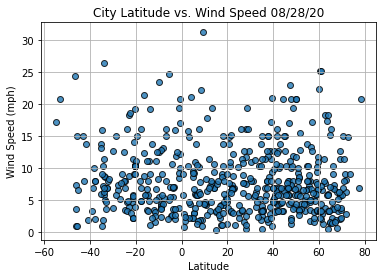

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from SciPy stats module
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equestion of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Saint George
Country                        US
Date          2020-08-28 19:42:51
Lat                          37.1
Lng                       -113.58
Max Temp                      100
Humidity                       13
Cloudiness                      1
Wind Speed                   5.82
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
547     True
548     True
549    False
550    False
551     True
Name: Lat, Length: 552, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sabang,ID,2020-08-28 19:43:59,5.89,95.32,83.41,72,100,6.06
6,Clyde River,CA,2020-08-28 19:43:59,70.47,-68.59,51.80,62,20,14.99
8,Nador,MA,2020-08-28 19:43:59,35.17,-2.93,87.80,39,0,14.99
9,Albany,US,2020-08-28 19:41:51,42.60,-73.97,75.00,61,26,10.09
13,Saint George,US,2020-08-28 19:42:51,37.10,-113.58,100.00,13,1,5.82
...,...,...,...,...,...,...,...,...,...
545,Lakota,CI,2020-08-28 19:44:58,5.85,-5.69,71.04,94,63,3.87
546,Jaque,PA,2020-08-28 19:44:58,7.52,-78.17,80.22,80,99,4.54
547,Mao,ES,2020-08-28 19:44:58,39.89,4.27,78.80,83,0,6.93
548,Kibala,TD,2020-08-28 19:44:58,9.11,18.35,72.09,94,100,1.07


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sabang,ID,2020-08-28 19:43:59,5.89,95.32,83.41,72,100,6.06
6,Clyde River,CA,2020-08-28 19:43:59,70.47,-68.59,51.80,62,20,14.99
8,Nador,MA,2020-08-28 19:43:59,35.17,-2.93,87.80,39,0,14.99
9,Albany,US,2020-08-28 19:41:51,42.60,-73.97,75.00,61,26,10.09
13,Saint George,US,2020-08-28 19:42:51,37.10,-113.58,100.00,13,1,5.82


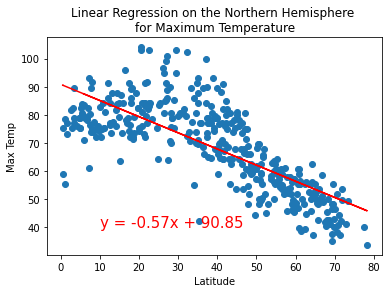

In [25]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (10,40))

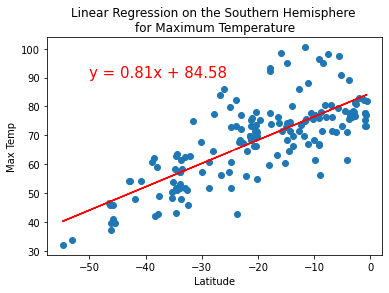

In [26]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (-50,90))

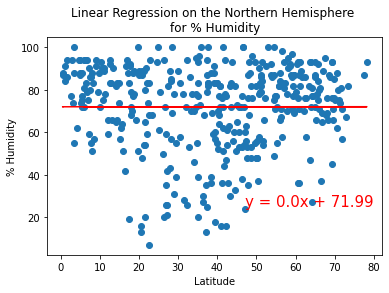

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(47,25))

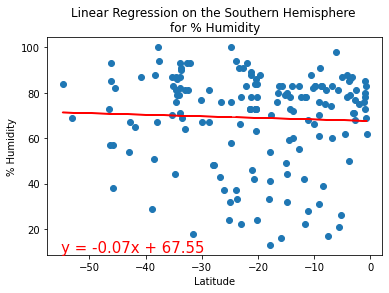

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-55,10))

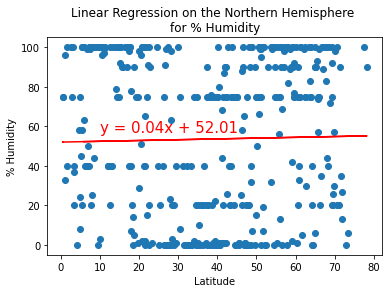

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(10,57))

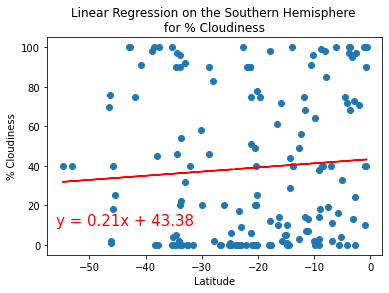

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-56,10))

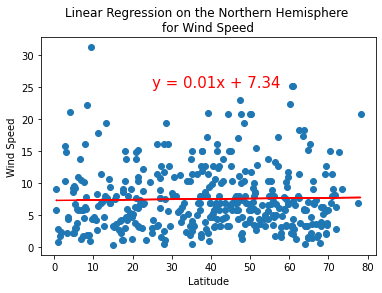

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(25,25))

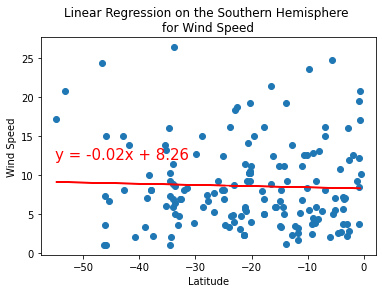

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-55,12))